In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from array import *

In [2]:
# reading and shuffling the data

df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values
myData = (df - df.min()) / (df.max() - df.min())

X = myData.iloc[:, :-1].to_numpy()
X1 = myData.iloc[:, 0:1].to_numpy() # strength
X2 = myData.iloc[:, 1:2].to_numpy() # temperature
Y = myData.iloc[:, -1:].to_numpy()

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_X1, test_X1, train_X2, test_X2, train_Y, test_Y = X[:splitData], X[splitData:], X1[:splitData], X1[splitData:], X2[:splitData], X2[splitData:], Y[:splitData], Y[splitData:]

In [5]:
#setting parameters of the model

maxDeg = 9
iter_value = 500
iter_value += 1
skip_num = 50
learningRate = 0.05

iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((maxDeg+1, maxDeg+1, maxDeg+1))
error_array = np.zeros((maxDeg+1, iter_scaled))

In [6]:
def stocasticGD(deg, X1, X2, Y, learning_rate, iterations):
    
    wMatrix = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
        for n in range(deg+1-m):
            wMatrix[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]                   # contains strength
            row2 = X2[z]                  # contains temperature
            column = Y[z]               # contains pressure
            dataP_error = 0            # variable for calculating error in each data point
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dataP_error += wMatrix[m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dataP_error -= column                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn
                
             # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):             # power of x2
                    wMatrix[m][n] -= (learning_rate/len(X)) * dataP_error * (row1**m) * (row2**n) # calculating w0,w1,w2,... for each iteration
                    
            sumItrError +=  (dataP_error**2)*0.5  
        sumItrError = (sumItrError/len(Y))**0.5
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError
            print("Error of ", itr ," iteration of degree ", deg, " :  " ,sumItrError)
                    
        if(itr == iterations - 1):
            print("\n\nError of last iteration of degree ", deg, " :  " ,sumItrError)
            
            for m in range(deg+1):           
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = wMatrix[m][n]
    return sumItrError

Error of  0  iteration of degree  0  :   [0.27266801]
Error of  50  iteration of degree  0  :   [0.23946538]
Error of  100  iteration of degree  0  :   [0.23946538]
Error of  150  iteration of degree  0  :   [0.23946538]
Error of  200  iteration of degree  0  :   [0.23946538]
Error of  250  iteration of degree  0  :   [0.23946538]
Error of  300  iteration of degree  0  :   [0.23946538]
Error of  350  iteration of degree  0  :   [0.23946538]
Error of  400  iteration of degree  0  :   [0.23946538]
Error of  450  iteration of degree  0  :   [0.23946538]
Error of  500  iteration of degree  0  :   [0.23946538]


Error of last iteration of degree  0  :   [0.23946538]


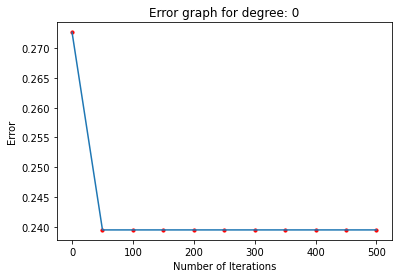

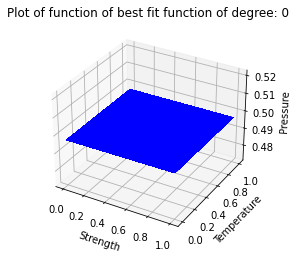


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  1  :   [1.06505942]
Error of  50  iteration of degree  1  :   [0.21296768]
Error of  100  iteration of degree  1  :   [0.21295468]
Error of  150  iteration of degree  1  :   [0.21295478]
Error of  200  iteration of degree  1  :   [0.21295478]
Error of  250  iteration of degree  1  :   [0.21295478]
Error of  300  iteration of degree  1  :   [0.21295478]
Error of  350  iteration of degree  1  :   [0.21295478]
Error of  400  iteration of degree  1  :   [0.21295478]
Error of  450  iteration of degree  1  :   [0.21295478]
Error of  500  iteration of degree  1  :   [0.21295478]


Error of last iteration of degree  1  :   [0.21295478]


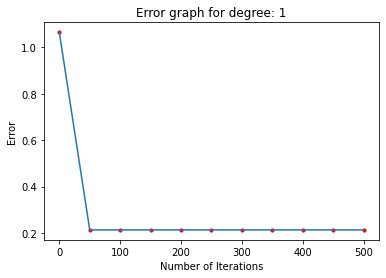

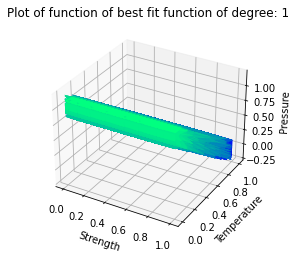


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  2  :   [0.62619404]
Error of  50  iteration of degree  2  :   [0.21872054]
Error of  100  iteration of degree  2  :   [0.21730298]
Error of  150  iteration of degree  2  :   [0.21623065]
Error of  200  iteration of degree  2  :   [0.21542078]
Error of  250  iteration of degree  2  :   [0.21480971]
Error of  300  iteration of degree  2  :   [0.21434898]
Error of  350  iteration of degree  2  :   [0.21400177]
Error of  400  iteration of degree  2  :   [0.21374019]
Error of  450  iteration of degree  2  :   [0.21354316]
Error of  500  iteration of degree  2  :   [0.21339478]


Error of last iteration of degree  2  :   [0.21339478]


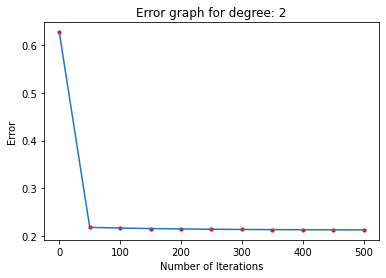

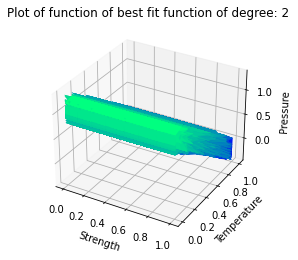


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  3  :   [0.37640101]
Error of  50  iteration of degree  3  :   [0.21456375]
Error of  100  iteration of degree  3  :   [0.21253333]
Error of  150  iteration of degree  3  :   [0.21162556]
Error of  200  iteration of degree  3  :   [0.21121742]
Error of  250  iteration of degree  3  :   [0.21103063]
Error of  300  iteration of degree  3  :   [0.21094182]
Error of  350  iteration of degree  3  :   [0.21089644]
Error of  400  iteration of degree  3  :   [0.2108704]
Error of  450  iteration of degree  3  :   [0.21085303]
Error of  500  iteration of degree  3  :   [0.21083961]


Error of last iteration of degree  3  :   [0.21083961]


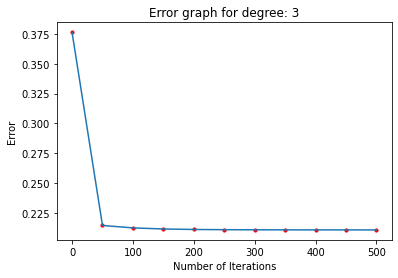

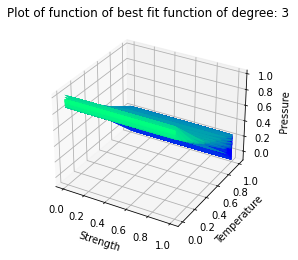


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  4  :   [0.36765424]
Error of  50  iteration of degree  4  :   [0.2271933]
Error of  100  iteration of degree  4  :   [0.21868116]
Error of  150  iteration of degree  4  :   [0.21660827]
Error of  200  iteration of degree  4  :   [0.21596962]
Error of  250  iteration of degree  4  :   [0.21564887]
Error of  300  iteration of degree  4  :   [0.2154037]
Error of  350  iteration of degree  4  :   [0.21518179]
Error of  400  iteration of degree  4  :   [0.21497172]
Error of  450  iteration of degree  4  :   [0.21477082]
Error of  500  iteration of degree  4  :   [0.21457829]


Error of last iteration of degree  4  :   [0.21457829]


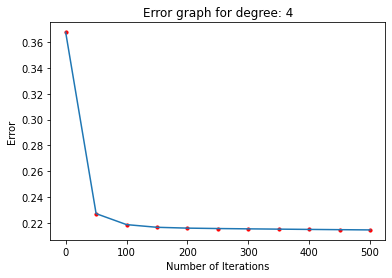

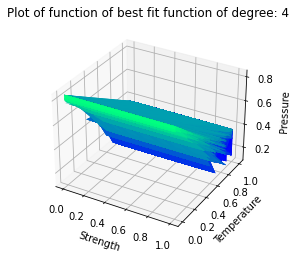


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  5  :   [0.92998576]
Error of  50  iteration of degree  5  :   [0.21537699]
Error of  100  iteration of degree  5  :   [0.21498753]
Error of  150  iteration of degree  5  :   [0.21463191]
Error of  200  iteration of degree  5  :   [0.21430724]
Error of  250  iteration of degree  5  :   [0.21401084]
Error of  300  iteration of degree  5  :   [0.21374028]
Error of  350  iteration of degree  5  :   [0.21349331]
Error of  400  iteration of degree  5  :   [0.21326789]
Error of  450  iteration of degree  5  :   [0.21306215]
Error of  500  iteration of degree  5  :   [0.21287436]


Error of last iteration of degree  5  :   [0.21287436]


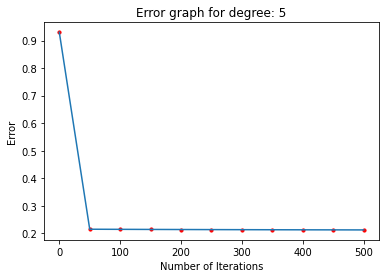

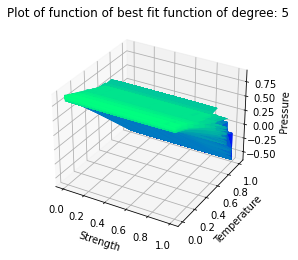


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  6  :   [0.35899898]
Error of  50  iteration of degree  6  :   [0.21633346]
Error of  100  iteration of degree  6  :   [0.21381413]
Error of  150  iteration of degree  6  :   [0.21330138]
Error of  200  iteration of degree  6  :   [0.21292894]
Error of  250  iteration of degree  6  :   [0.21261368]
Error of  300  iteration of degree  6  :   [0.21234453]
Error of  350  iteration of degree  6  :   [0.21211454]
Error of  400  iteration of degree  6  :   [0.21191792]
Error of  450  iteration of degree  6  :   [0.21174973]
Error of  500  iteration of degree  6  :   [0.21160577]


Error of last iteration of degree  6  :   [0.21160577]


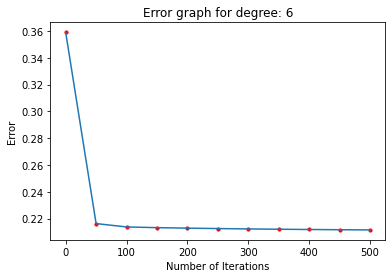

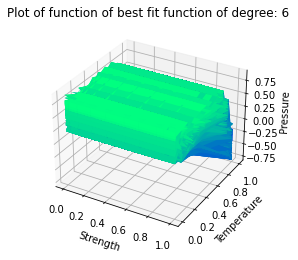


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  7  :   [0.74506293]
Error of  50  iteration of degree  7  :   [0.21377058]
Error of  100  iteration of degree  7  :   [0.21316165]
Error of  150  iteration of degree  7  :   [0.21270114]
Error of  200  iteration of degree  7  :   [0.21233753]
Error of  250  iteration of degree  7  :   [0.2120497]
Error of  300  iteration of degree  7  :   [0.21182127]
Error of  350  iteration of degree  7  :   [0.21163935]
Error of  400  iteration of degree  7  :   [0.21149385]
Error of  450  iteration of degree  7  :   [0.21137686]
Error of  500  iteration of degree  7  :   [0.21128219]


Error of last iteration of degree  7  :   [0.21128219]


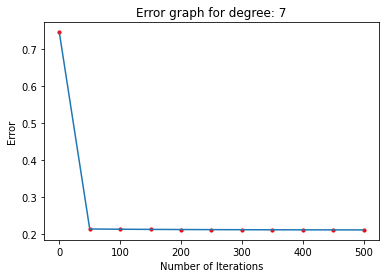

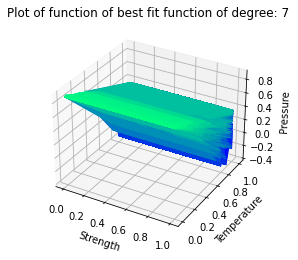


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  8  :   [1.07098752]
Error of  50  iteration of degree  8  :   [0.21559403]
Error of  100  iteration of degree  8  :   [0.21353043]
Error of  150  iteration of degree  8  :   [0.21256528]
Error of  200  iteration of degree  8  :   [0.21187947]
Error of  250  iteration of degree  8  :   [0.21138872]
Error of  300  iteration of degree  8  :   [0.21103663]
Error of  350  iteration of degree  8  :   [0.21078304]
Error of  400  iteration of degree  8  :   [0.2105994]
Error of  450  iteration of degree  8  :   [0.21046542]
Error of  500  iteration of degree  8  :   [0.2103667]


Error of last iteration of degree  8  :   [0.2103667]


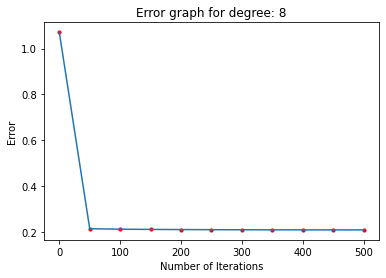

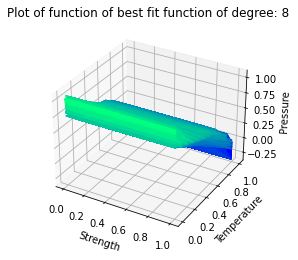


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  9  :   [0.48874658]
Error of  50  iteration of degree  9  :   [0.21373343]
Error of  100  iteration of degree  9  :   [0.21321451]
Error of  150  iteration of degree  9  :   [0.21287062]
Error of  200  iteration of degree  9  :   [0.21262729]
Error of  250  iteration of degree  9  :   [0.21244823]
Error of  300  iteration of degree  9  :   [0.21231045]
Error of  350  iteration of degree  9  :   [0.21219938]
Error of  400  iteration of degree  9  :   [0.21210578]
Error of  450  iteration of degree  9  :   [0.21202379]
Error of  500  iteration of degree  9  :   [0.2119497]


Error of last iteration of degree  9  :   [0.2119497]


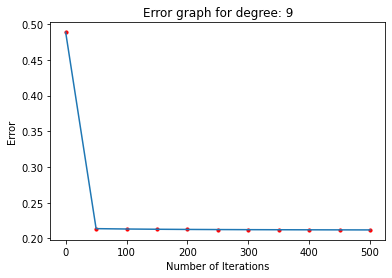

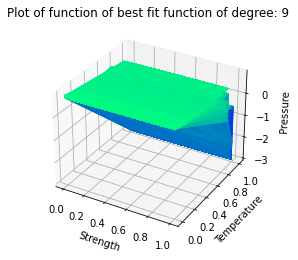


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



Degree  8  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1
x_axis=[]

for i in range(iter_scaled):
    x_axis.append(i*skip_num)
    
for i in range(maxDeg+1):
    SGD_Error = stocasticGD(i, train_X1, train_X1, train_Y, 0.5, iter_value)
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
    error_list = error_array[i].tolist()  

    plt.plot(x_axis, error_list)
    plt.scatter(x_axis, error_list, s=10, marker='o', color='red')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    
    
    x = test_X1
    y = test_X2
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((495,495))
    for m in range(i+1):                    # power of x1
        for n in range(i+1-m):            # power of x2
            Z += coeff_list[i][m][n]*(x**m) * (y**n)

            
    # Plotting of Surface Plots
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='winter', edgecolor='none')

    ax.set_xlabel('Strength')
    ax.set_ylabel('Temperature')
    ax.set_zlabel('Pressure')
    title = "Plot of function of best fit function of degree: " + str(i)
    ax.set_title(title)
    plt.show()
    print("\n-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
    
    
print("\nDegree ", minErrorDeg, " gives minimum error.")      

In [8]:
def Testing_Error(deg, X1, X2, Y):
    
    totalTestingError = 0
    for z in range(len(Y)):   # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]
        testingError = 0
            
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list[deg][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                  # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
        totalTestingError +=  (testingError**2)*0.5  
    
    totalTestingError = (totalTestingError/len(Y))**0.5
    print("Testing error of degree ", deg, " is: " ,totalTestingError)
            
    return totalTestingError

In [9]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(maxDeg+1):
    SGD_Error = Testing_Error(i, test_X1, test_X2, test_Y)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("\nDegree ", minErrorDeg, " gives minimum testing error. \nMinimum testing error = ", minError) 

Testing errors for various degrees are as follows:
Testing error of degree  0  is:  [0.24636597]
Testing error of degree  1  is:  [0.39917973]
Testing error of degree  2  is:  [0.44386991]
Testing error of degree  3  is:  [0.28616965]
Testing error of degree  4  is:  [0.26328698]
Testing error of degree  5  is:  [0.40303251]
Testing error of degree  6  is:  [0.27663875]
Testing error of degree  7  is:  [0.37033744]
Testing error of degree  8  is:  [0.30062881]
Testing error of degree  9  is:  [0.74417427]

Degree  0  gives minimum testing error. 
Minimum testing error =  [0.24636597]
